# Forecasting - Time Series

#### Build a forecast model on coca-cola quarterly sales data of the year 1986 to 1996. Also forecast the sales for next 2years using the least RMSE model.

In [1]:
# import libraries
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
from statsmodels.tsa.ar_model import AutoReg

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
cola_df = pd.read_excel(r"D:\360digi\DS\Sharath\Forecasting_3_Smoothing\handson\Datasets_Forecasting-3\CocaCola_Sales_Rawdata.xlsx")
cola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
cola_df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
cola_df['Q'] = pd.DataFrame(cola_df['Quarter'].apply(lambda x: x[0:2]))
cola_df.head()

,Quarter,Sales,Q
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [6]:
# creating dummy variables for 4 quaters
Q_dummies = pd.DataFrame(pd.get_dummies(cola_df['Q']))
Q_dummies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [7]:
df = pd.concat([cola_df, Q_dummies], axis = 1)
df.head()

,Quarter,Sales,Q,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
 2   Q        42 non-null     object 
 3   Q1       42 non-null     uint8  
 4   Q2       42 non-null     uint8  
 5   Q3       42 non-null     uint8  
 6   Q4       42 non-null     uint8  
dtypes: float64(1), object(2), uint8(4)
memory usage: 1.3+ KB


In [9]:
df

,Quarter,Sales,Q,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


# Data Preprocessing

In [10]:
# Linear Trend is captured
df["t"] = np.arange(1,43)
df.head()

,Quarter,Sales,Q,Q1,Q2,Q3,Q4,t
0,Q1_86,1734.827000,Q1,1,0,0,0,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2
2,Q3_86,2533.804993,Q3,0,0,1,0,3
3,Q4_86,2154.962997,Q4,0,0,0,1,4
4,Q1_87,1547.818996,Q1,1,0,0,0,5


In [11]:
# Quadratic trend or polynomial with '2' degrees trend is captured
df["t_square"] = df["t"] * df["t"]

In [12]:
# Exponential trend is captured
df["log_Sales"] = np.log(df["Sales"])

In [13]:
df.head()

,Quarter,Sales,Q,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


<AxesSubplot:>

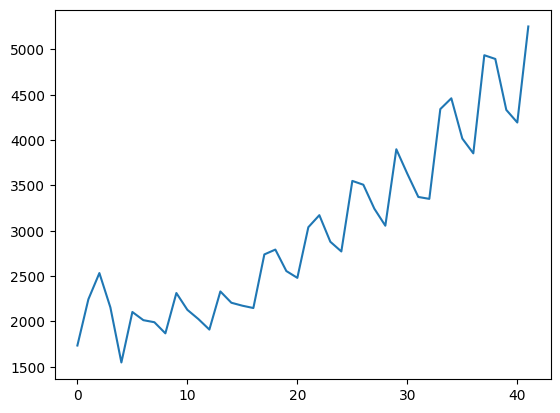

In [14]:
# Visualization - Time plot
df.Sales.plot()

In [ ]:
# Trend - upward

In [15]:
# Data Partition
Train = df.head(38)
Test = df.tail(4)

In [16]:
Test

,Quarter,Sales,Q,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


# Forecasting models

In [17]:
# Linear Model
linear_model = smf.ols('Sales ~ t', data = Train).fit()

In [18]:
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_linear))**2))
rmse_linear

591.5532957223963

In [19]:
# Exponential Model
Exp = smf.ols('log_Sales ~ t', data = Train).fit()

In [20]:
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

466.24797310672346

In [21]:
# Quadratic Model
Quad = smf.ols('Sales ~ t + t_square', data = Train).fit()

In [22]:
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_Quad))**2))
rmse_Quad

475.56183518315095

In [23]:
# Additive Seasonality
add_sea = smf.ols('Sales ~ Q1 + Q2 + Q3 + Q4', data = Train).fit()

In [24]:
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547283

In [25]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales ~ Q1 + Q2 + Q3 + Q4', data = Train).fit()

In [26]:
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1963.3896400779709

In [27]:
# Additive Seasonality Quadratic Trend
add_sea_Quad = smf.ols('Sales ~ t + t_square + Q1 + Q2 + Q3 + Q4', data = Train).fit()

In [28]:
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4', 't', 't_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.73800719352977

In [29]:
# Multiplicative Seasonality Linear Trend
Mul_sea_linear = smf.ols('log_Sales ~ t +  Q1 + Q2 + Q3 + Q4', data = Train).fit()

In [30]:
pred_Mult_sea_linear = pd.Series(Mul_sea_linear.predict(Test[['Q1', 'Q2', 'Q3', 'Q4', 't']]))
rmse_Mult_sea_linear = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Mult_sea_linear)))**2))
rmse_Mult_sea_linear

225.5243904982721

In [31]:
data = {"MODEL":pd.Series(["rmse_linear", "rmse_Exp", "rmse_Quad", "rmse_add_sea", "rmse_Mult_sea", "rmse_add_sea_quad", "rmse_Mult_sea_linear"]), "RMSE_Values":pd.Series([rmse_linear, rmse_Exp, rmse_Quad, rmse_add_sea, rmse_Mult_sea, rmse_add_sea_quad, rmse_Mult_sea_linear])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,591.553296
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
3,rmse_add_sea,1860.023815
4,rmse_Mult_sea,1963.389640
5,rmse_add_sea_quad,301.738007
6,rmse_Mult_sea_linear,225.524390


In [ ]:
# 'rmse_Mult_sea_linear' has the least RMSE value among the models prepared so far. Use these features and build forecasting model using entire data

In [32]:
model = smf.ols('log_Sales ~ t + Q1 + Q2 + Q3 + Q4', data = df).fit()

In [ ]:
# RESIDUALS MIGHT HAVE ADDITIONAL INFORMATION!

In [33]:
# Autoregression Model (AR)
# Calculating Residuals from best model applied on full data
# AV - FV
full_res = df.Sales - model.predict(df)
full_res

0     1727.487776
1     2237.381252
2     2526.233665
3     2147.471744
4     1540.383104
5     2096.735580
6     2006.695003
7     1984.159076
8     1861.517438
9     2305.858912
10    2120.555335
11    2019.144408
12    1902.974767
13    2323.295241
14    2198.688662
15    2166.186736
16    2140.552102
17    2731.341578
18    2784.795996
19    2548.132067
20    2473.151433
21    3031.459906
22    3164.061327
23    2871.026403
24    2764.080765
25    3541.840242
26    3499.848661
27    3235.788728
28    3047.984097
29    3890.743574
30    3620.751993
31    3364.832067
32    3343.887428
33    4333.646905
34    4452.655324
35    4008.735398
36    3845.790760
37    4927.550237
38    4886.558656
39    4324.638730
40    4185.694091
41    5244.453568
dtype: float64

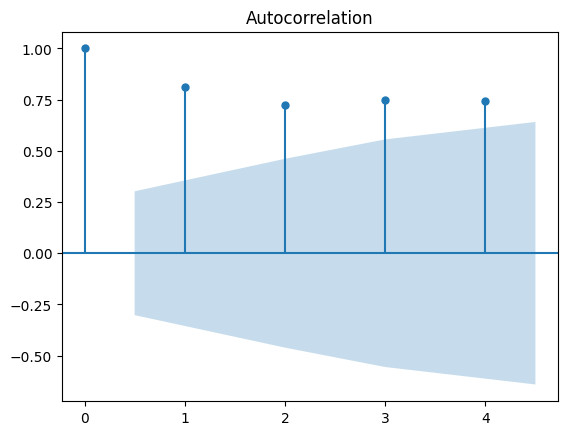

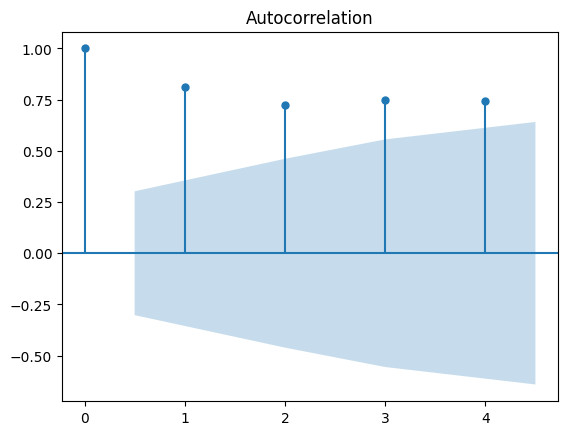

In [34]:
# ACF plot on residuals
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags = 4)

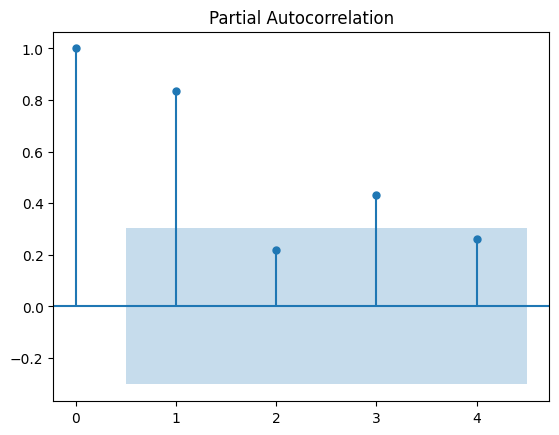

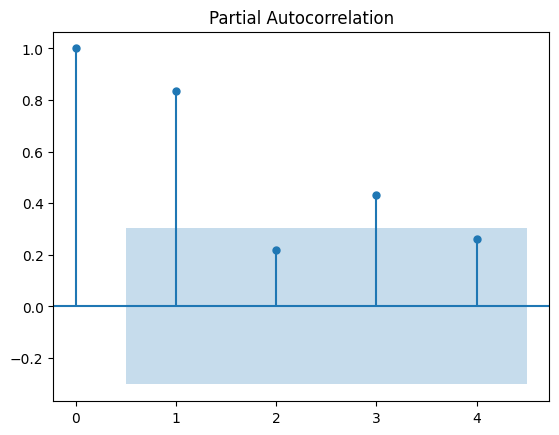

In [35]:
# PACF is a partial auto-correlation function. It finds correlations of Y with lags of the residuals of the time series 
tsa_plots.plot_pacf(full_res, lags = 4)

In [36]:
# AR Autoregressive model
model_ar = AutoReg(full_res, lags = [1])
model_fit = model_ar.fit()

In [37]:
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept    257.660388
y.L1           0.941364
dtype: float64


In [38]:
# Predict for next 2years
pred_res = model_fit.predict(start = len(df), end = len(df) + 8 - 1, dynamic = False)
pred_res.reset_index(drop = True, inplace = True)

In [39]:
# The Final Predictions using MSLT and AR(1) Model
pred_res

0    5194.600940
1    5147.671464
2    5103.493738
3    5061.906410
4    5022.757591
5    4985.904296
6    4951.211926
7    4918.553772
dtype: float64